# Performance

From the very beginning of the project I'll be evaluating the performance and scalabilty of the implementations to determine if the project is worth pursuing.

In [30]:
%matplotlib inline

In [31]:
import pandas

In [32]:
df_ftl = pandas.read_csv("results/0.0.1-0-gb3e470e.csv")
df_ansible = pandas.read_csv("results/2.10.9.csv")
df = pandas.concat([df_ftl, df_ansible])
# df

In [33]:
df2 = df.pivot(index="n", columns="name", values="time")
# df2

<AxesSubplot:title={'center':'Local Module Execution Duration'}, xlabel='num hosts', ylabel='time in seconds'>

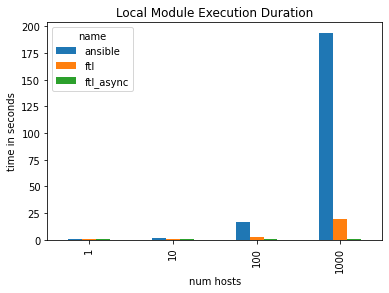

In [34]:
df2.plot.bar(
    title="Local Module Execution Duration",
    ylabel="time in seconds",
    xlabel="num hosts",
)

In [35]:
ftl_speedup = df2["ansible"] / df2["ftl"]
ftl_speedup = pandas.DataFrame(ftl_speedup, columns=["ftl_speedup"])
# ftl_speedup

ftl_async_speedup = df2["ansible"] / df2["ftl_async"]
ftl_async_speedup = pandas.DataFrame(ftl_async_speedup, columns=["ftl_async_speedup"])
# ftl_async_speedup

df_speedup = pandas.concat([ftl_speedup, ftl_async_speedup], axis=1)
df_speedup

,ftl_speedup,ftl_async_speedup
n,,
1,3.474430,4.886518
10,2.622535,4.908754
100,7.369428,67.040689
1000,9.968105,271.582549


<AxesSubplot:title={'center':'Local Execution Speedup over Ansible 2.10.9'}, xlabel='num hosts', ylabel='speedup'>

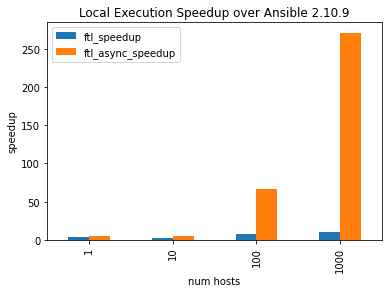

In [38]:
df_speedup.plot.bar(
    title="Local Execution Speedup over Ansible 2.10.9",
    xlabel="num hosts",
    ylabel="speedup",
)

In [44]:
remote_df_ftl = pandas.read_csv("results/remote_0.0.1-9-g155d181.csv")
remote_df_ftl_async = pandas.read_csv("results/remote_0.0.1-12-g02e184c.csv")
remote_df_ansible = pandas.read_csv("results/remote_2.10.9.csv")
remote_df = pandas.concat([remote_df_ftl, remote_df_ansible, remote_df_ftl_async])
remote_df

,cmd,name,type,n,time
0,ftl -i inventory_remote1.yml -M modules -m arg...,ftl_remote,argtest,1,0.730426
1,ftl -i inventory_remote10.yml -M modules -m ar...,ftl_remote,argtest,10,1.009212
2,ftl -i inventory_remote100.yml -M modules -m a...,ftl_remote,argtest,100,10.130745
3,ftl -i inventory_remote1000.yml -M modules -m ...,ftl_remote,argtest,1000,100.975752
0,ansible -M modules -i inventory_remote1.yml -m...,ansible_remote,argtest,1,1.043501
1,ansible -M modules -i inventory_remote10.yml -...,ansible_remote,argtest,10,2.073435
2,ansible -M modules -i inventory_remote100.yml ...,ansible_remote,argtest,100,20.927322
3,ansible -M modules -i inventory_remote1000.yml...,ansible_remote,argtest,1000,202.218750
0,ftl -i inventory_remote1.yml -M ftl_modules -f...,ftl_async_remote,argtest,1,0.709527
1,ftl -i inventory_remote10.yml -M ftl_modules -...,ftl_async_remote,argtest,10,0.936199


In [45]:
remote_df2 = remote_df.pivot(index="n", columns="name", values="time")
remote_df2

name,ansible_remote,ftl_async_remote,ftl_remote
n,,,
1,1.043501,0.709527,0.730426
10,2.073435,0.936199,1.009212
100,20.927322,10.236780,10.130745
1000,202.218750,100.988570,100.975752


<AxesSubplot:title={'center':'Remote Module Execution Duration'}, xlabel='num hosts', ylabel='time in seconds'>

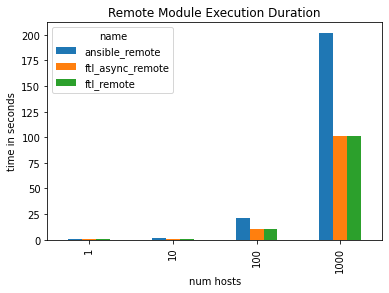

In [46]:
remote_df2.plot.bar(
    title="Remote Module Execution Duration",
    ylabel="time in seconds",
    xlabel="num hosts",
)

In [50]:
ftl_speedup = remote_df2["ansible_remote"] / remote_df2["ftl_remote"]
ftl_speedup = pandas.DataFrame(ftl_speedup, columns=["ftl_speedup"])
# ftl_speedup

ftl_async_speedup = remote_df2["ansible_remote"] / remote_df2["ftl_async_remote"]
ftl_async_speedup = pandas.DataFrame(ftl_async_speedup, columns=["ftl_async_speedup"])
# ftl_async_speedup

df_speedup = pandas.concat([ftl_speedup, ftl_async_speedup], axis=1)
df_speedup

,ftl_speedup,ftl_async_speedup
n,,
1,1.428620,1.470699
10,2.054509,2.214738
100,2.065724,2.044327
1000,2.002647,2.002392


<AxesSubplot:title={'center':'Remote Execution Speedup over Ansible 2.10.9'}, xlabel='num hosts', ylabel='speedup'>

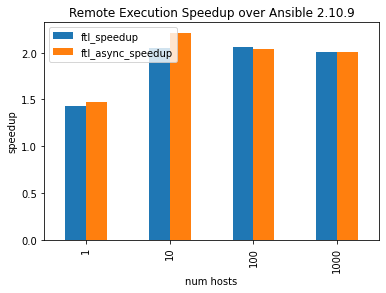

In [51]:
df_speedup.plot.bar(
    title="Remote Execution Speedup over Ansible 2.10.9",
    xlabel="num hosts",
    ylabel="speedup",
)